In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy

In [2]:
def add_coastlines(figax,set_global=False):
    ax = figax[1]
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,show=True
        ):

    if figax is None:
        fig,ax = plt.subplots(1,subplot_kw=plot_options)
        if set_global:
            ax.set_global()
        ax.coastlines()
        figax = [fig,ax]
    else:
        ax = figax[1]
    
    if spatial_index_values is not None:
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        siv_triang = tri.Triangulation(lons,lats,intmat)
        ax.triplot(siv_triang,transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

km = 1 # Unit of length

In [3]:
# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43


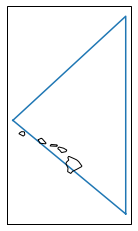

In [4]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444
resolution_scale_km = 1000*km

spatial_resolution_level = int(ps.spatial_resolution(resolution_scale_km))

spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,ps.spatial_resolution(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))

figax = hello_plot(spatial_id)


lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec43  lvl 3 ~ 1280.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec44  lvl 4 ~ 640.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec45  lvl 5 ~ 320.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec46  lvl 6 ~ 160.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec47  lvl 7 ~ 80.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec48  lvl 8 ~ 40.000000 km


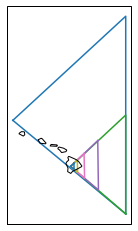

In [5]:
# Cycle through higher resolution levels
figax = add_coastlines(plt.subplots(subplot_kw={'projection':proj,'transform':transf}))

spatial_resolution_level = 3

for siv in range(6):
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

    print('lon,lat=(%f,%f)->%s'%(lon,lat,hex16(spatial_id[0])),
          ' lvl %i ~ %f km'%(spatial_resolution_level
                             ,ps.spatial_scale_km(spatial_resolution_level)))
        
    figax = hello_plot(spatial_id,figax,plot_options,show=False)
    spatial_resolution_level = spatial_resolution_level + 1

plt.show()



lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec40  lvl 0 ~ 10240.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec41  lvl 1 ~ 5120.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec42  lvl 2 ~ 2560.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec43  lvl 3 ~ 1280.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec44  lvl 4 ~ 640.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec45  lvl 5 ~ 320.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec46  lvl 6 ~ 160.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec47  lvl 7 ~ 80.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec48  lvl 8 ~ 40.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec49  lvl 9 ~ 20.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4a  lvl 10 ~ 10.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4b  lvl 11 ~ 5.000000 km
lon,lat=(-155.602778,19.479444)->0x2c2401f47797ec4c  lvl 12 ~ 2.500000 km
lon,lat=(-155.602778,19.4

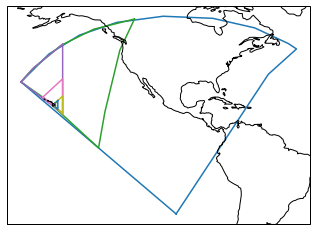

In [6]:
# Cycle through all resolution levels
figax = add_coastlines(plt.subplots(subplot_kw={'projection':proj,'transform':transf}))

spatial_resolution_level = 0

for siv in range(28):
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)
    spatial_id = ps.from_latlon([lat],[lon],spatial_resolution_level)

    print('lon,lat=(%f,%f)->%s'%(lon,lat,hex16(spatial_id[0])),
          ' lvl %i ~ %f km'%(spatial_resolution_level
                             ,ps.spatial_scale_km(spatial_resolution_level)))
        
    figax = hello_plot(spatial_id,figax,plot_options,show=False)
    spatial_resolution_level = spatial_resolution_level + 1

plt.show()


